Import Library:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

Load Dataset:

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/Colaboratory/Walmart Sales Forecasting/train.csv", names=['Store','Dept','Date','Weekly_Sales','IsHoliday'],sep=',', header=0)
df_features = pd.read_csv("/content/drive/MyDrive/Colaboratory/Walmart Sales Forecasting/features.csv",sep=',', header=0,
                       names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                              'MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
df_stores = pd.read_csv("/content/drive/MyDrive/Colaboratory/Walmart Sales Forecasting/stores.csv", names=['Store','Type','Size'],sep=',', header=0)



FileNotFoundError: ignored

In [ ]:
print('\nTrain Dataset:\n', df_train.head())
print('\nFeatures Dataset:\n', df_features.head())
print('\nStores Dataset:\n', df_stores.head())

In [3]:
print('Shape of Train DataFrame:', df_train.shape)
print('Shape of Features DataFrame:', df_features.shape)
print('Shape of Stores DataFrame:', df_stores.shape)

NameError: ignored

In [ ]:
df = df_train.merge(df_stores, how='left').merge(df_features, how='left')

In [ ]:
df.shape

(421570, 16)

In [ ]:
# df.head(100)

In [ ]:
# df.tail(100)

In [ ]:
# df_train.head(100)

In [ ]:
# df_features.head(100)

In [ ]:
# df_stores.head()

In [ ]:
# df = df_train.merge(df_features, on = ['Date', 'Store', 'IsHoliday'], how = 'inner').merge(df_stores, on = ['Store'], how = 'inner')

In [ ]:
# df.drop(columns = 'IsHoliday_y')
# df = df.rename({'IsHoliday_x' : 'IsHoliday'}, axis = 1)

In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [ ]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [ ]:
mk_down = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[mk_down].mean()

MarkDown1    7246.420196
MarkDown2    3334.628621
MarkDown3    1439.421384
MarkDown4    3383.168256
MarkDown5    4628.975079
dtype: float64

In [ ]:
# df[mk_down].median()

In [ ]:
# df = df.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1)

In [ ]:
for col in mk_down:
  # df[col] = df[col].fillna(df[col].mean())
  df[col] = df[col].fillna(0)


In [ ]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

Data Visualization

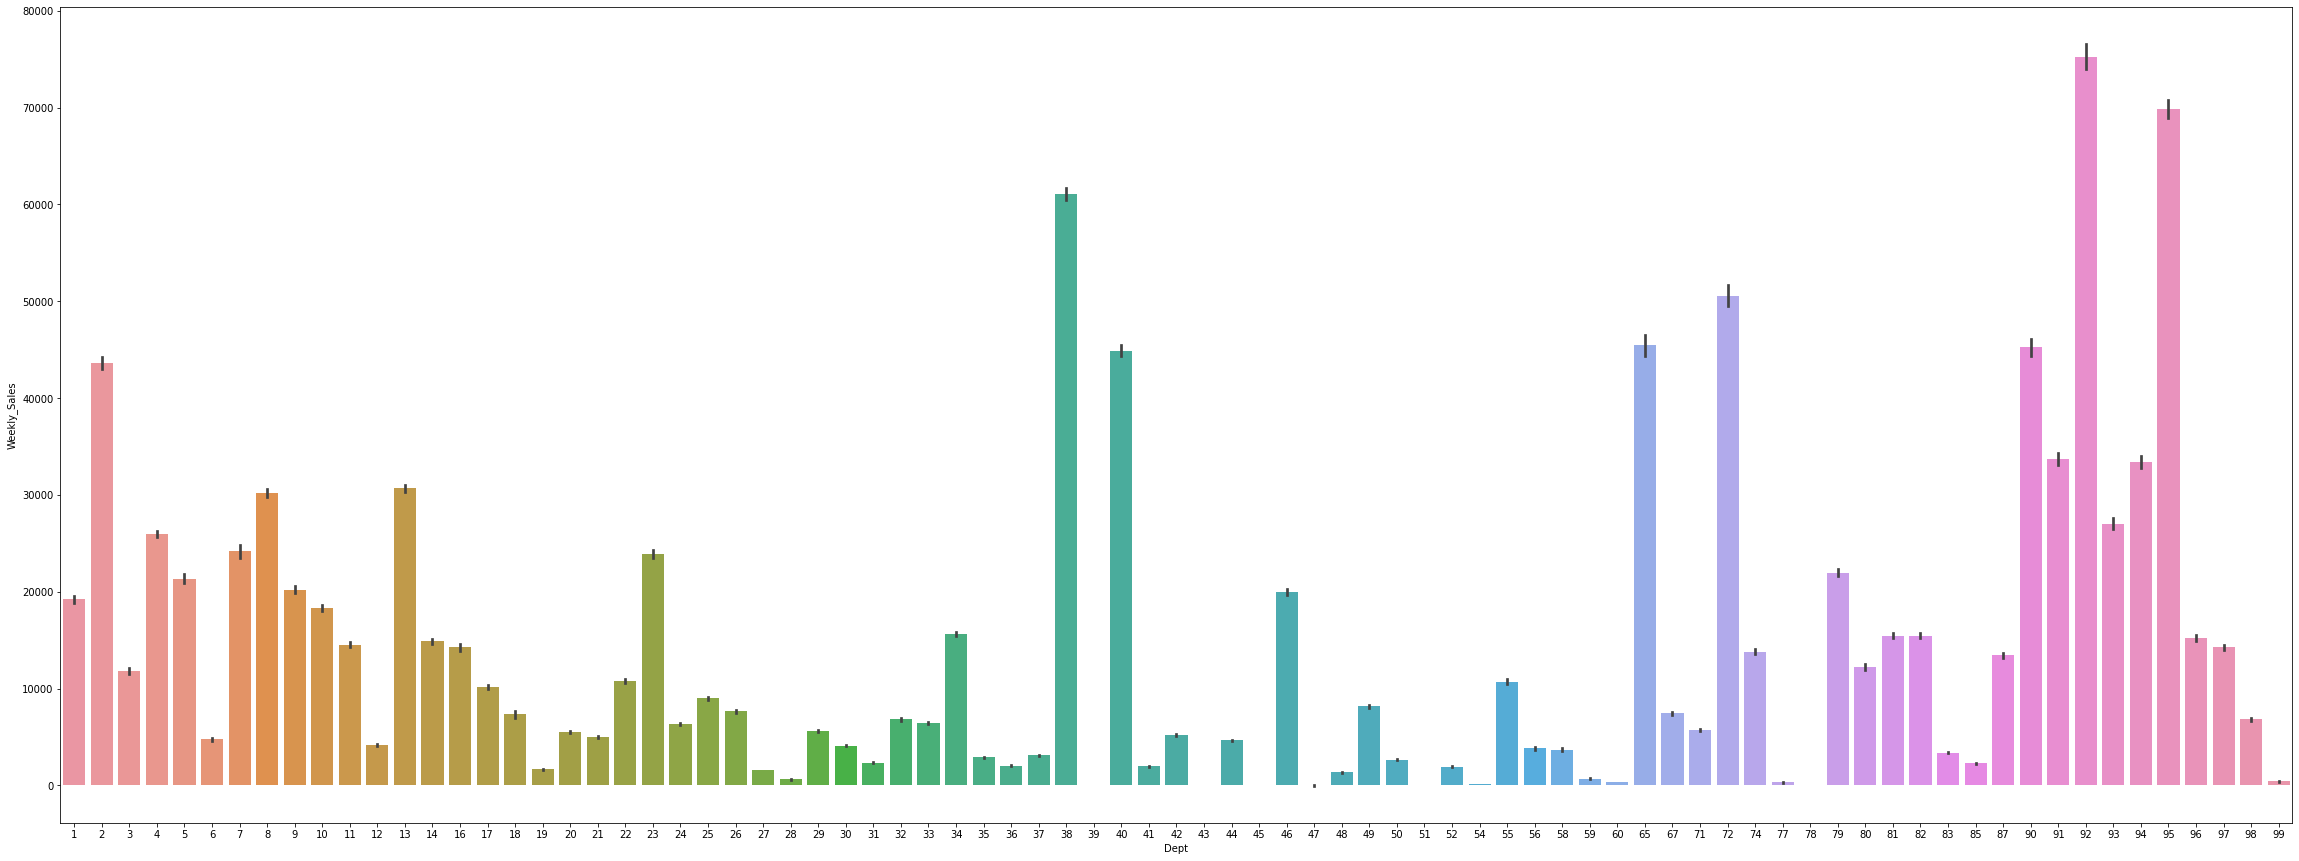

In [ ]:
plt.figure(figsize = (40, 15))
sns.barplot(data = df, x = 'Dept', y = 'Weekly_Sales')

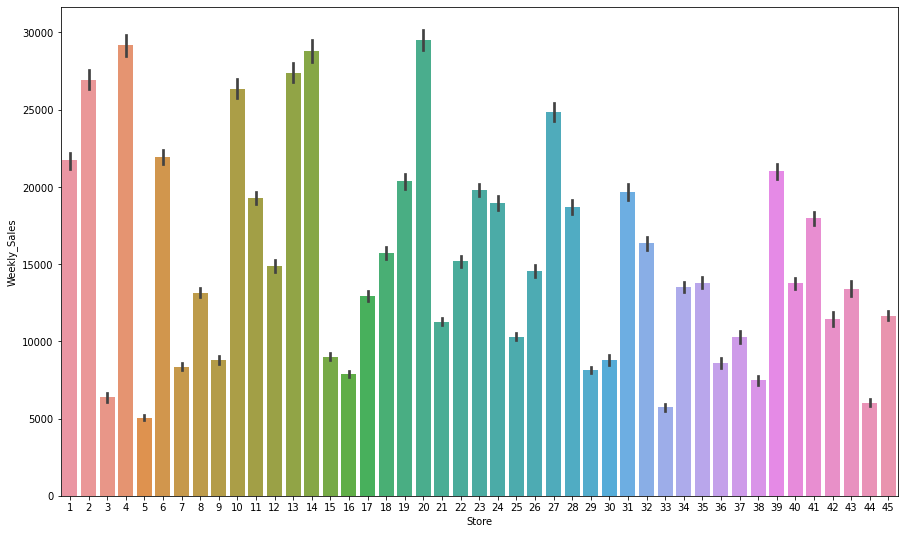

In [ ]:
plt.figure(figsize = (15, 9))
sns.barplot(data = df, x ='Store', y = 'Weekly_Sales')

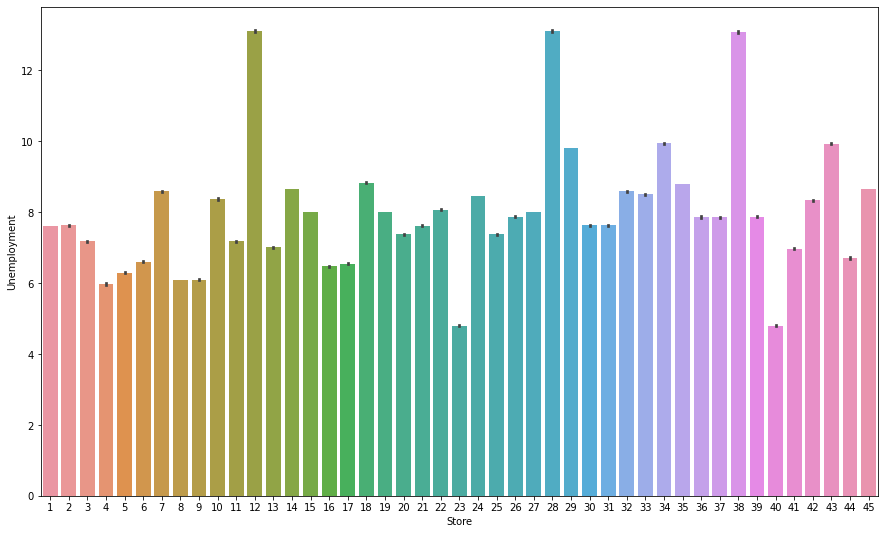

In [ ]:
plt.figure(figsize = (15, 9))
sns.barplot(data = df, x ='Store', y = 'Unemployment')

In [ ]:
# plt.figure(figsize = (15, 9))
# sns.barplot(data = df, x ='Weekly_Sales', y = 'Size')
# plt.show()

<Figure size 1080x648 with 0 Axes>

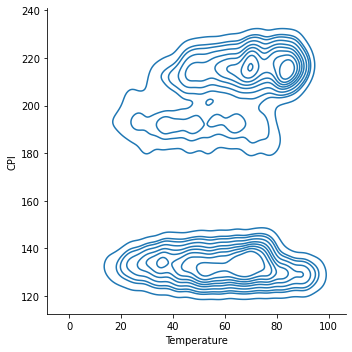

In [ ]:
plt.figure(figsize = (15, 9))
sns.displot(data = df, x = 'Temperature', y = 'CPI', kind = 'kde')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['week'] = df['Date'].dt.week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

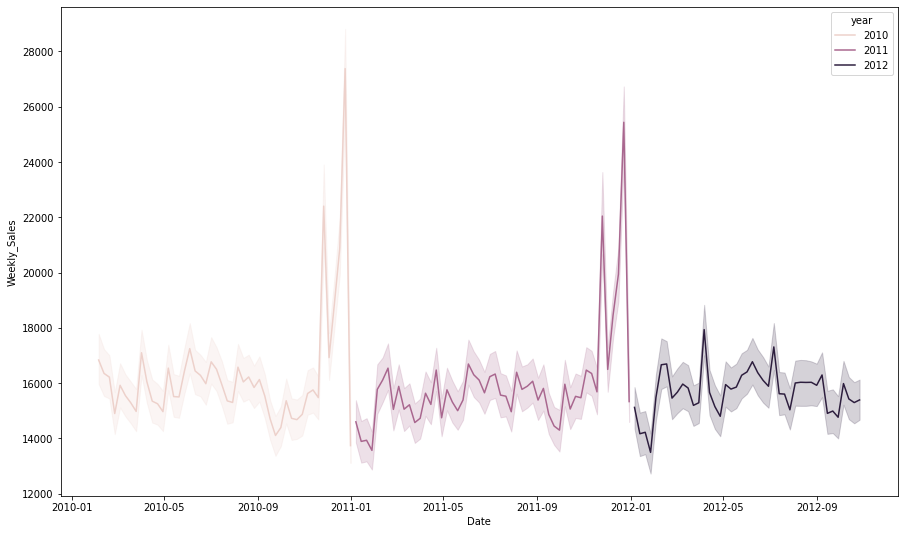

In [ ]:
plt.figure(figsize = (15, 9))
sns.lineplot(data = df, x = 'Date', y = 'Weekly_Sales', hue = 'year')

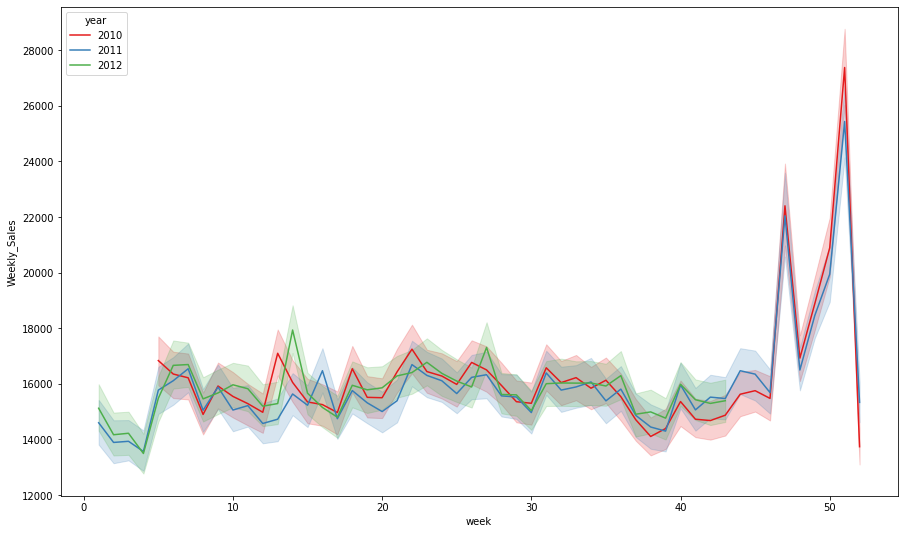

In [ ]:
plt.figure(figsize = (15, 9))
sns.lineplot(data = df, x = 'week', y = 'Weekly_Sales', hue = 'year', palette = 'Set1')

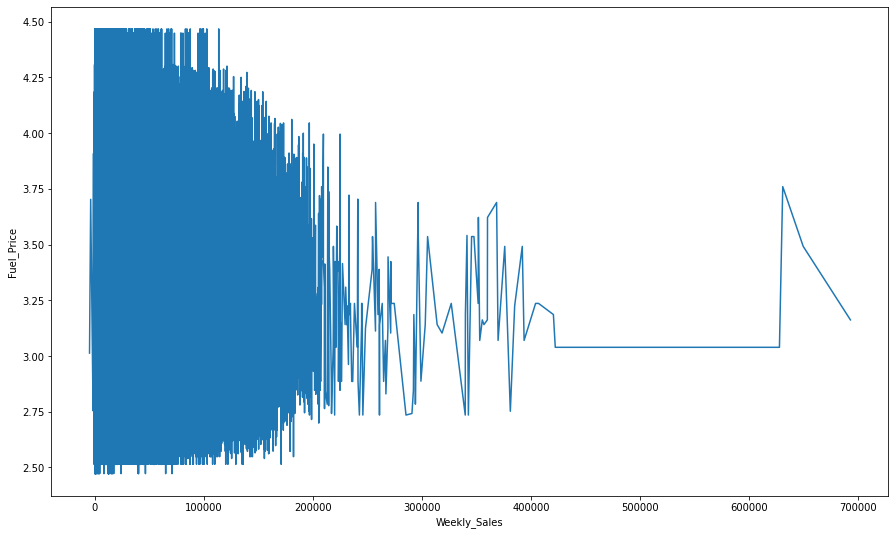

In [ ]:
plt.figure(figsize = (15, 9))
sns.lineplot(data = df, x = 'Weekly_Sales', y = 'Fuel_Price')

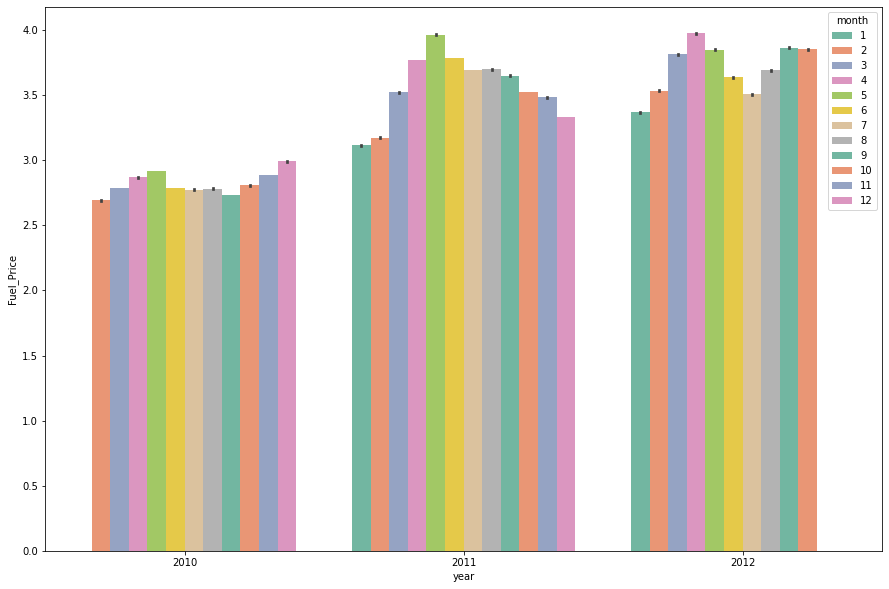

In [ ]:
plt.figure(figsize = (15, 10))
sns.barplot(data = df, x= 'year', y = 'Fuel_Price', hue = 'month', palette = 'Set2')

In [ ]:
le = LabelEncoder()

df['IsHoliday'] = le.fit_transform(df['IsHoliday'])
df['Type'] = le.fit_transform(df['Type'])

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
Type                     int64
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
week                     int64
month                    int64
year                     int64
dtype: object

In [ ]:
target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]

In [ ]:
# remove outliers
new_df = df.copy()
for i in features:
  Q1 = new_df[i].quantile(0.25)
  Q3 = new_df[i].quantile(0.75)
  IQR = Q3 - Q1
  new_df = new_df[new_df[i] <= (Q3 + (1.5 * IQR))]
  new_df = new_df[new_df[i] >= (Q1 - (1.5 * IQR))]
  new_df = new_df.reset_index(drop = True)
display(new_df.head())
print('\nBefore remove outliers, the dataset {}'.format(df.shape[0]))
print('After remove outliers, the dataset {}'.format(new_df.shape[0]))

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,week,month,year
0,1,1,2010-02-05,24924.50,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,5,2,2010
1,1,1,2010-02-19,41595.55,0,0,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,7,2,2010
2,1,1,2010-02-26,19403.54,0,0,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,8,2,2010
3,1,1,2010-03-05,21827.90,0,0,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,9,3,2010
4,1,1,2010-03-12,21043.39,0,0,151315,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,10,3,2010



Before remove outliers, the dataset 421570
After remove outliers, the dataset 229765


In [ ]:
new_df.shape

(229765, 19)

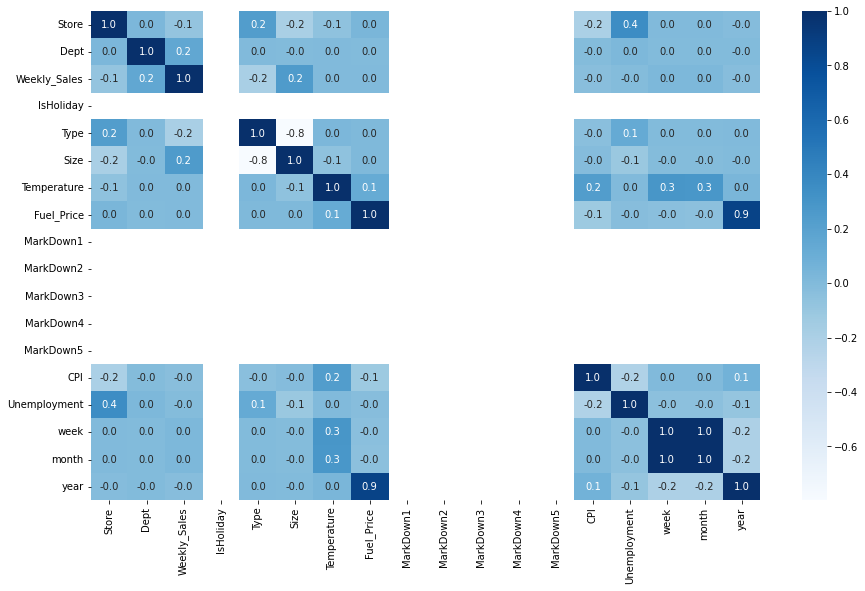

In [ ]:
plt.figure(figsize = (15, 9))
sns.heatmap(new_df.corr(), annot = True, cmap = 'Blues', fmt='.1f')

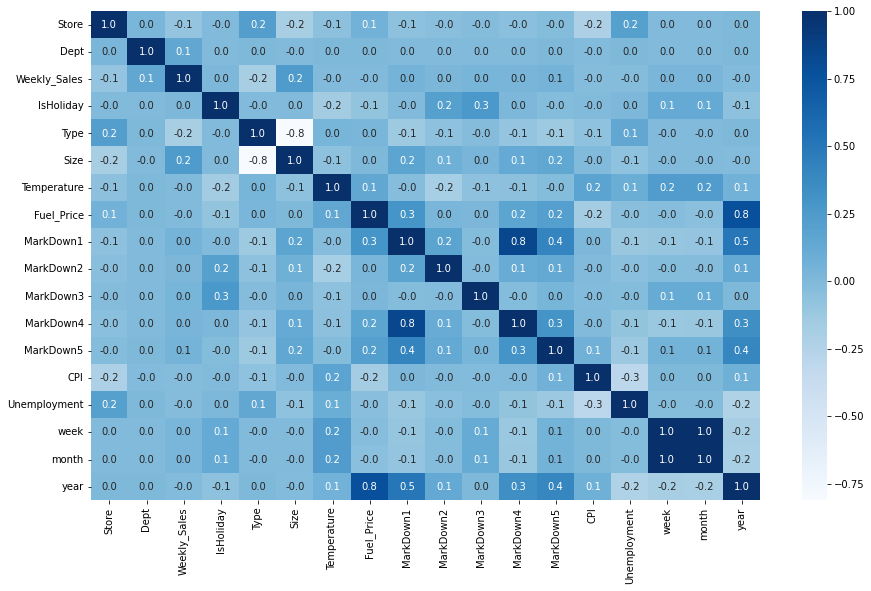

In [ ]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', fmt='.1f')

In [ ]:
# X = df.drop(columns = ['Date', 'MarkDown1'], axis = 1)
# y = df['MarkDown1']
X = new_df.drop(columns = ['Date', 'Weekly_Sales'], axis = 1)
y = new_df['Weekly_Sales']

In [ ]:
print(X.shape)
print(y.shape)

(229765, 17)
(229765,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (183812, 17)
Shape of X_test: (45953, 17)
Shape of y_train: (183812,)
Shape of y_test: (45953,)


In [ ]:
scale = StandardScaler()

X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.fit_transform(X_test)

In [ ]:
model = {}
y_pred = {}

model['LinReg'] = LinearRegression()
model['RandomForestReg'] = RandomForestRegressor()
model['GBoostRegressor'] = GradientBoostingRegressor()
# model['SVR'] = SVR()
# model['NeighborsRegressor'] = KNeighborsRegressor()
# model['Lasso'] = Lasso()

for m in model:
  model[m].fit(X_train_scale, y_train)
  y_pred[m] = model[m].predict(X_test_scale)

In [ ]:
r2 = {}
mae = {}
mse = {}


for model in y_pred:
  r2[model] = r2_score(y_test, y_pred[model])
  mae[model] = mean_absolute_error(y_test, y_pred[model])
  mse[model] = mean_squared_error(y_test, y_pred[model])

  print('\nR2_SCORE\n{}'.format(model), r2[model])
  print('\nMAE\n{}'.format(model), mae[model])
  print('\nMSE\n{}'.format(model), mse[model])


R2_SCORE
LinReg 0.0916266346454282

MAE
LinReg 14422.272201255582

MSE
LinReg 452787001.68081874

R2_SCORE
RandomForestReg 0.501936864132992

MAE
RandomForestReg 5763.81033074228

MSE
RandomForestReg 248264119.7311431

R2_SCORE
GBoostRegressor 0.48116067007354424

MAE
GBoostRegressor 8891.191602455518

MSE
GBoostRegressor 258620203.4444125


In [ ]:
# X = new_df.drop(columns = ['Date', 'Fuel_Price'], axis = 1)
# y = new_df['Fuel_Price']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [ ]:
# scale = StandardScaler()

# X_train_scale = scale.fit_transform(X_train)
# X_test_scale = scale.fit_transform(X_test)

In [ ]:
# model = {}
# y_pred = {}

# model['LinReg'] = LinearRegression()
# model['GBRegressor'] = GradientBoostingRegressor()
# model['ForestRegressor'] = RandomForestRegressor()

# for m in model:
#   model[m].fit(X_train_scalee, y_train)
#   y_pred[m] = model[m].predict(X_test_scale)
